# Weather Forecasting using NeuralProphet

### Install and Import Dependencies

In [2]:
!pip install neuralprophet 

In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

### Creating a dataframe 

In [4]:
df = pd.read_csv('C:\Britti\projects\weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### 

In [6]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
a = df.Rainfall.max()
a
df.loc[a]

Date             2009-12-07
Location             Albury
MinTemp                13.4
MaxTemp                31.9
Rainfall                0.0
Evaporation             NaN
Sunshine                NaN
WindGustDir               W
WindGustSpeed          39.0
WindDir9am              ENE
WindDir3pm               NW
WindSpeed9am            6.0
WindSpeed3pm           28.0
Humidity9am            47.0
Humidity3pm            19.0
Pressure9am          1012.3
Pressure3pm          1009.0
Cloud9am                NaN
Cloud3pm                NaN
Temp9am                21.2
Temp3pm                30.6
RainToday                No
RainTomorrow             No
Name: 371, dtype: object

In [8]:
a = df.Rainfall.min()
a
df.loc[a]

Date             2008-12-01
Location             Albury
MinTemp                13.4
MaxTemp                22.9
Rainfall                0.6
Evaporation             NaN
Sunshine                NaN
WindGustDir               W
WindGustSpeed          44.0
WindDir9am                W
WindDir3pm              WNW
WindSpeed9am           20.0
WindSpeed3pm           24.0
Humidity9am            71.0
Humidity3pm            22.0
Pressure9am          1007.7
Pressure3pm          1007.1
Cloud9am                8.0
Cloud3pm                NaN
Temp9am                16.9
Temp3pm                21.8
RainToday                No
RainTomorrow             No
Name: 0, dtype: object

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [11]:
#changing date data type from object to datetime 
#selecting melbourne for pre-processing 
mel = df[df['Location']=='Melbourne']
mel['Date'] = pd.to_datetime(mel['Date'])
mel.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [12]:
mel.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

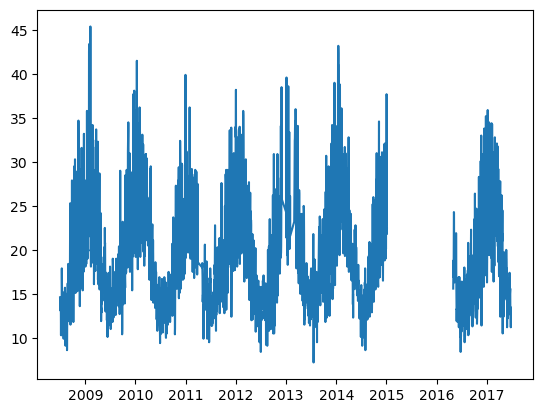

In [13]:
plt.plot(mel['Date'], mel['Temp3pm'])
plt.show
#missing data between 2015 to 2016

WARNING - (py.warnings._showwarnmsg) - C:\Users\britt\AppData\Local\Temp\ipykernel_12112\3922203112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mel['Year'] = mel['Date'].apply(lambda x: x.year)



<function matplotlib.pyplot.show(close=None, block=None)>

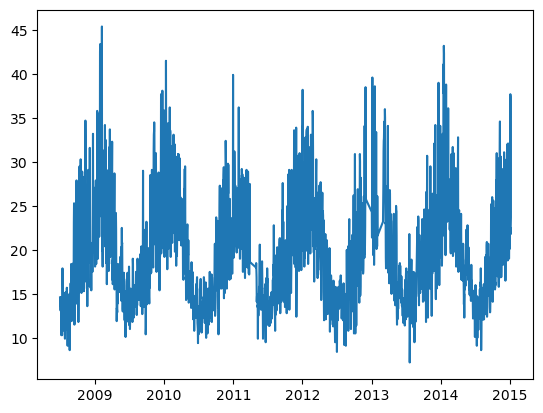

In [53]:
#using data only till the year 2015 
mel['Year'] = mel['Date'].apply(lambda x: x.year)
mel = mel[mel['Year'] <= 2015]
plt.plot(mel['Date'], mel['Temp3pm'])
plt.show

In [64]:
data = mel[['Date', 'Temp3pm']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data

WARNING - (py.warnings._showwarnmsg) - C:\Users\britt\AppData\Local\Temp\ipykernel_12112\2846623812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6
...,...,...
69486,2015-01-01,23.7
69487,2015-01-02,37.7
69488,2015-01-03,37.4
69489,2015-01-04,21.8


In [67]:
data.tail()

,ds,y
69486,2015-01-01,23.7
69487,2015-01-02,37.7
69488,2015-01-03,37.4
69489,2015-01-04,21.8
69490,2015-01-05,22.4


## Train model

In [65]:
model = NeuralProphet()
model.fit(data, freq = 'D', epochs = 1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (36) is too small than the required number                     for the learning rate finder (234). The results might not be optimal.
Missing logger folder: C:\Users\britt\Desktop\lightning_logs


Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,21.741039,27.130253,0.554123,0.0,0
1,16.296885,20.658375,0.387446,0.0,1
2,12.738433,16.096432,0.277433,0.0,2
3,10.186695,12.825436,0.196587,0.0,3
4,8.140387,10.425025,0.140176,0.0,4
...,...,...,...,...,...
995,2.989649,3.950566,0.033770,0.0,995
996,2.995452,3.972537,0.033945,0.0,996
997,2.989182,3.965487,0.033900,0.0,997
998,2.987197,3.963897,0.033776,0.0,998


## Forecasting

In [84]:
future = model.make_future_dataframe(data, periods=500)
forecast = model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.8% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.8% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.008366,20.044704,4.655611,0.308050
1,2015-01-07,None,24.864105,20.045654,4.786816,0.031635
2,2015-01-08,None,24.971554,20.046604,4.915675,0.009278
3,2015-01-09,None,25.022442,20.047550,5.041555,-0.066664
4,2015-01-10,None,25.167469,20.048500,5.163741,-0.044772


In [85]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
495,2016-05-15,None,18.168800,20.514763,-2.409592,0.063628
496,2016-05-16,None,17.729935,20.515713,-2.483931,-0.301847
497,2016-05-17,None,18.265083,20.516663,-2.559610,0.308029
498,2016-05-18,None,17.913086,20.517612,-2.636355,0.031828
499,2016-05-19,None,17.813168,20.518562,-2.714925,0.009529


In [86]:
model.plot(forecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'b97036de-9840-448b-b693-443d73339610',
              'x': array([datetime.datetime(2015, 1, 6, 0, 0),
                          datetime.datetime(2015, 1, 7, 0, 0),
                          datetime.datetime(2015, 1, 8, 0, 0), ...,
                          datetime.datetime(2016, 5, 17, 0, 0),
                          datetime.datetime(2016, 5, 18, 0, 0),
                          datetime.datetime(2016, 5, 19, 0, 0)], dtype=object),
              'y': array([25.008366, 24.864105, 24.971554, ..., 18.265083, 17.913086, 17.813168],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '6

In [87]:
model.plot_components(forecast)

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '9e9e6c7f-aeeb-4b2d-aa7c-ae3cac0e6b14',
              'x': array([datetime.datetime(2015, 1, 6, 0, 0),
                          datetime.datetime(2015, 1, 7, 0, 0),
                          datetime.datetime(2015, 1, 8, 0, 0), ...,
                          datetime.datetime(2016, 5, 17, 0, 0),
                          datetime.datetime(2016, 5, 18, 0, 0),
                          datetime.datetime(2016, 5, 19, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([20.044704, 20.045654, 20.046604, ..., 20.516663, 20.517612, 20.518562],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',


## Saving model

In [88]:
with open('forecast_model.pkl', 'wb') as f:
    pickle.dump(model, f)